## 1. Importación de Librerías y Carga de Datos

In [27]:
# Importación de todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Configuración para mostrar todas las columnas en pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📚 Librerías importadas exitosamente!")
print("🐍 Versión de Python:", __import__('sys').version.split()[0])
print("🐼 Versión de Pandas:", pd.__version__)
print("🔢 Versión de NumPy:", np.__version__)

📚 Librerías importadas exitosamente!
🐍 Versión de Python: 3.9.23
🐼 Versión de Pandas: 2.3.1
🔢 Versión de NumPy: 1.26.4


In [28]:
# Definición de nombres de columnas según la documentación del dataset
# Estructura: ID, Diagnosis, luego 30 features (10 características × 3 estadísticos)
columnas = [
    "ID", "Diagnosis",
    # Mean values (1)
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    # Standard Error (2) 
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    # Worst values (3)
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Carga de datos
print("📁 Cargando dataset...")
df = pd.read_csv("./db/wdbc.data", names=columnas)

# Información básica del dataset
print(f"✅ Dataset cargado exitosamente!")
print(f"📊 Forma del dataset: {df.shape}")
print(f"🔍 Primeras 5 filas:")
print(df.head())

📁 Cargando dataset...
✅ Dataset cargado exitosamente!
📊 Forma del dataset: (569, 32)
🔍 Primeras 5 filas:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.1328

## 2. Análisis Exploratorio de Datos (EDA)

In [29]:
# ========================================================================================
# 2.1. INFORMACIÓN GENERAL DEL DATASET
# ========================================================================================

print("=" * 80)
print("📋 RESUMEN GENERAL DEL DATASET")
print("=" * 80)

# Información básica
print(f"🔹 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"🔹 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Tipos de datos
print(f"\n📊 TIPOS DE DATOS:")
print(df.dtypes.value_counts())

# Información sobre valores nulos
print(f"\n❌ VALORES NULOS:")
null_counts = df.isnull().sum()
if null_counts.sum() == 0:
    print("✅ ¡Excelente! No hay valores nulos en el dataset")
else:
    print(null_counts[null_counts > 0])

# Análisis de la variable objetivo (Diagnosis)
print(f"\n🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Diagnosis):")
diagnosis_counts = df['Diagnosis'].value_counts()
diagnosis_pct = df['Diagnosis'].value_counts(normalize=True) * 100

for diagnosis, count in diagnosis_counts.items():
    pct = diagnosis_pct[diagnosis]
    label = "Maligno" if diagnosis == 'M' else "Benigno"
    print(f"   {diagnosis} ({label}): {count:3d} casos ({pct:5.1f}%)")

print(f"\n📈 BALANCE DEL DATASET:")
balance_ratio = diagnosis_counts.min() / diagnosis_counts.max()
print(f"   Ratio de balance: {balance_ratio:.3f} (1.0 = perfectamente balanceado)")
if balance_ratio < 0.5:
    print("   ⚠️  Dataset moderadamente desbalanceado - considerar técnicas de balanceo")
else:
    print("   ✅ Dataset razonablemente balanceado")

📋 RESUMEN GENERAL DEL DATASET
🔹 Dimensiones: 569 filas × 32 columnas
🔹 Memoria utilizada: 170.16 KB

📊 TIPOS DE DATOS:
float64    30
int64       1
object      1
Name: count, dtype: int64

❌ VALORES NULOS:
✅ ¡Excelente! No hay valores nulos en el dataset

🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Diagnosis):
   B (Benigno): 357 casos ( 62.7%)
   M (Maligno): 212 casos ( 37.3%)

📈 BALANCE DEL DATASET:
   Ratio de balance: 0.594 (1.0 = perfectamente balanceado)
   ✅ Dataset razonablemente balanceado


In [30]:
# ========================================================================================
# 2.2. ESTADÍSTICAS DESCRIPTIVAS DE LAS CARACTERÍSTICAS NUMÉRICAS
# ========================================================================================

print("=" * 80)
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)

# Separar características numéricas (excluir ID y Diagnosis)
feature_columns = [col for col in df.columns if col not in ['ID', 'Diagnosis']]
numerical_features = df[feature_columns]

print(f"📈 Análisis de {len(feature_columns)} características numéricas:")
print("\n🔸 Resumen estadístico completo:")
desc_stats = numerical_features.describe()
print(desc_stats)

print(f"\n🔸 Rangos de valores (min - max):")
for col in feature_columns[:10]:  # Mostrar solo las primeras 10 para no saturar
    min_val = numerical_features[col].min()
    max_val = numerical_features[col].max()
    range_val = max_val - min_val
    print(f"   {col:20s}: [{min_val:8.3f} - {max_val:8.3f}] (rango: {range_val:8.3f})")

print(f"\n💡 OBSERVACIONES IMPORTANTES:")
print(f"   • Las escalas varían significativamente entre características")
print(f"   • Área y perímetro tienen valores mucho mayores que smoothness y symmetry")  
print(f"   • Será necesaria estandarización antes del modelado")
print(f"   • No se observan valores negativos (como es esperado para medidas morfológicas)")

📊 ESTADÍSTICAS DESCRIPTIVAS
📈 Análisis de 30 características numéricas:

🔸 Resumen estadístico completo:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720          

🔍 Nombres de columnas disponibles:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


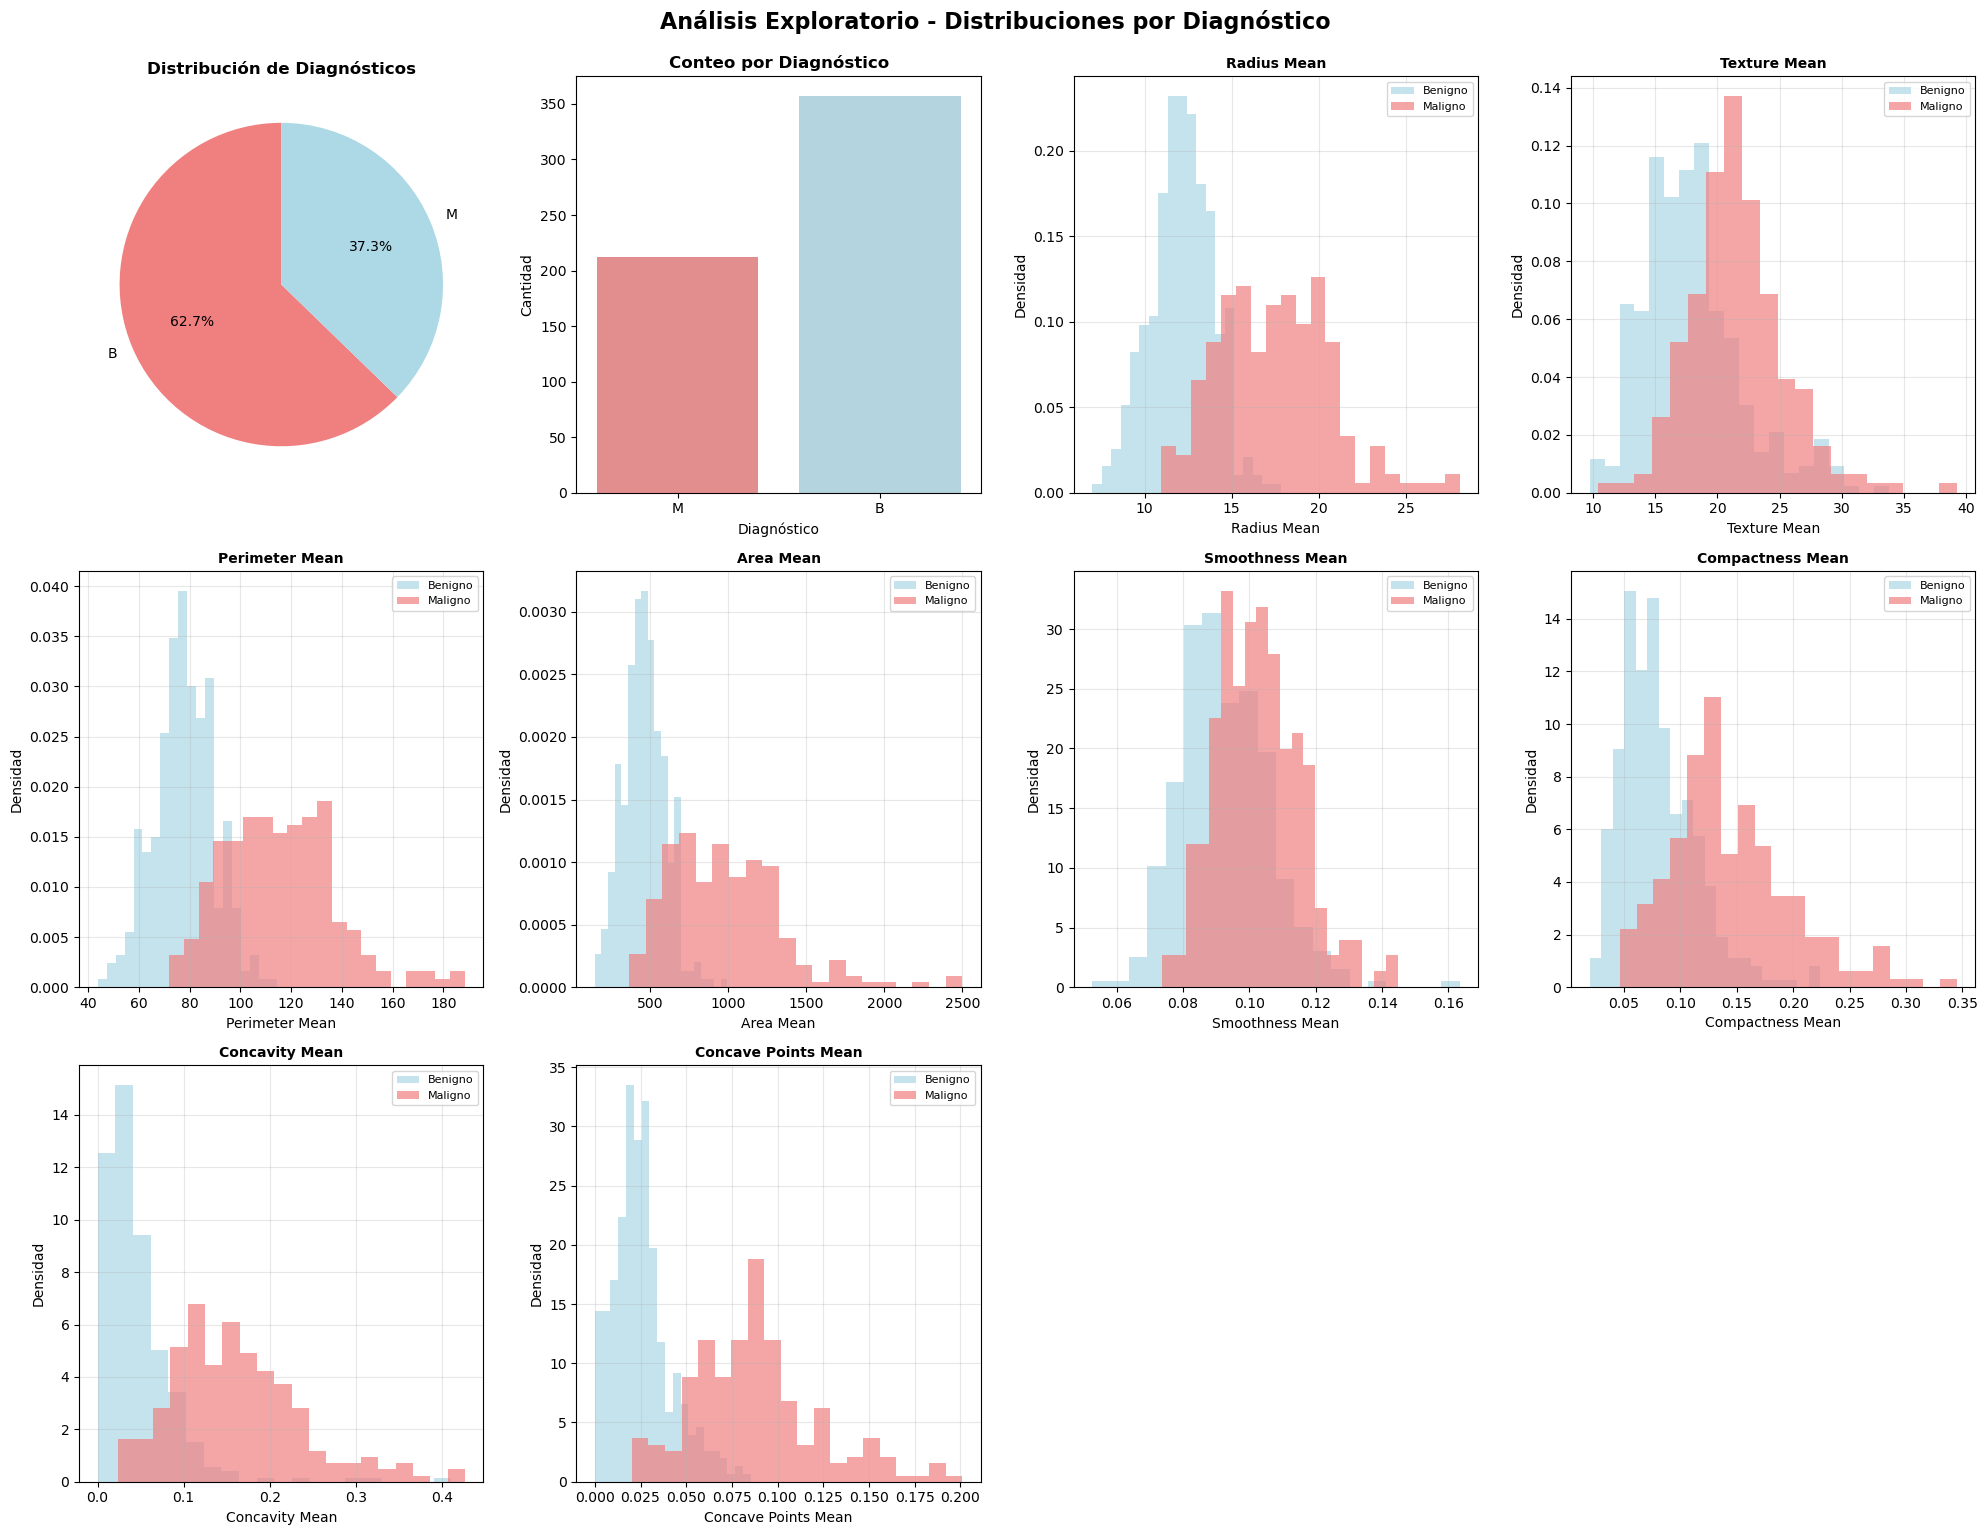


📊 INTERPRETACIONES CLAVE DE LAS DISTRIBUCIONES:
🔸 Los tumores malignos tienden a tener:
   • Radios, perímetros y áreas mayores
   • Mayor concavidad y compactness
   • Texturas más irregulares
🔸 Existe clara separabilidad entre clases
🔸 Algunas características muestran solapamiento considerable


In [31]:
# ========================================================================================
# 2.3. VISUALIZACIONES - DISTRIBUCIÓN DE CLASES Y CARACTERÍSTICAS PRINCIPALES
# ========================================================================================

# Primero verificar los nombres reales de las columnas
print("🔍 Nombres de columnas disponibles:")
feature_cols = [col for col in df.columns if col not in ['ID', 'Diagnosis']]
print(feature_cols[:10])  # Mostrar las primeras 10

# Crear figura con subplots
fig = plt.figure(figsize=(20, 15))

# 1. Distribución de diagnósticos (pie chart y bar chart)
plt.subplot(3, 4, 1)
diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                     colors=['lightcoral', 'lightblue'])
plt.title('Distribución de Diagnósticos', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.subplot(3, 4, 2)
sns.countplot(data=df, x='Diagnosis', palette=['lightcoral', 'lightblue'])
plt.title('Conteo por Diagnóstico', fontsize=12, fontweight='bold')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')

# 2. Distribución de las características principales (primeras 8 features)
main_features = feature_cols[:8]  # Usar los nombres reales de las columnas

for i, feature in enumerate(main_features, 3):
    plt.subplot(3, 4, i)
    
    # Histograma por diagnóstico
    benign = df[df['Diagnosis'] == 'B'][feature]
    malignant = df[df['Diagnosis'] == 'M'][feature]
    
    plt.hist(benign, bins=20, alpha=0.7, label='Benigno', color='lightblue', density=True)
    plt.hist(malignant, bins=20, alpha=0.7, label='Maligno', color='lightcoral', density=True)
    
    plt.title(f'{feature.replace("_", " ").title()}', fontsize=10, fontweight='bold')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Densidad')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Análisis Exploratorio - Distribuciones por Diagnóstico', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("\n📊 INTERPRETACIONES CLAVE DE LAS DISTRIBUCIONES:")
print("=" * 60)
print("🔸 Los tumores malignos tienden a tener:")
print("   • Radios, perímetros y áreas mayores")
print("   • Mayor concavidad y compactness")
print("   • Texturas más irregulares")
print("🔸 Existe clara separabilidad entre clases")
print("🔸 Algunas características muestran solapamiento considerable")

🔗 ANÁLISIS DE CORRELACIÓN ENTRE CARACTERÍSTICAS


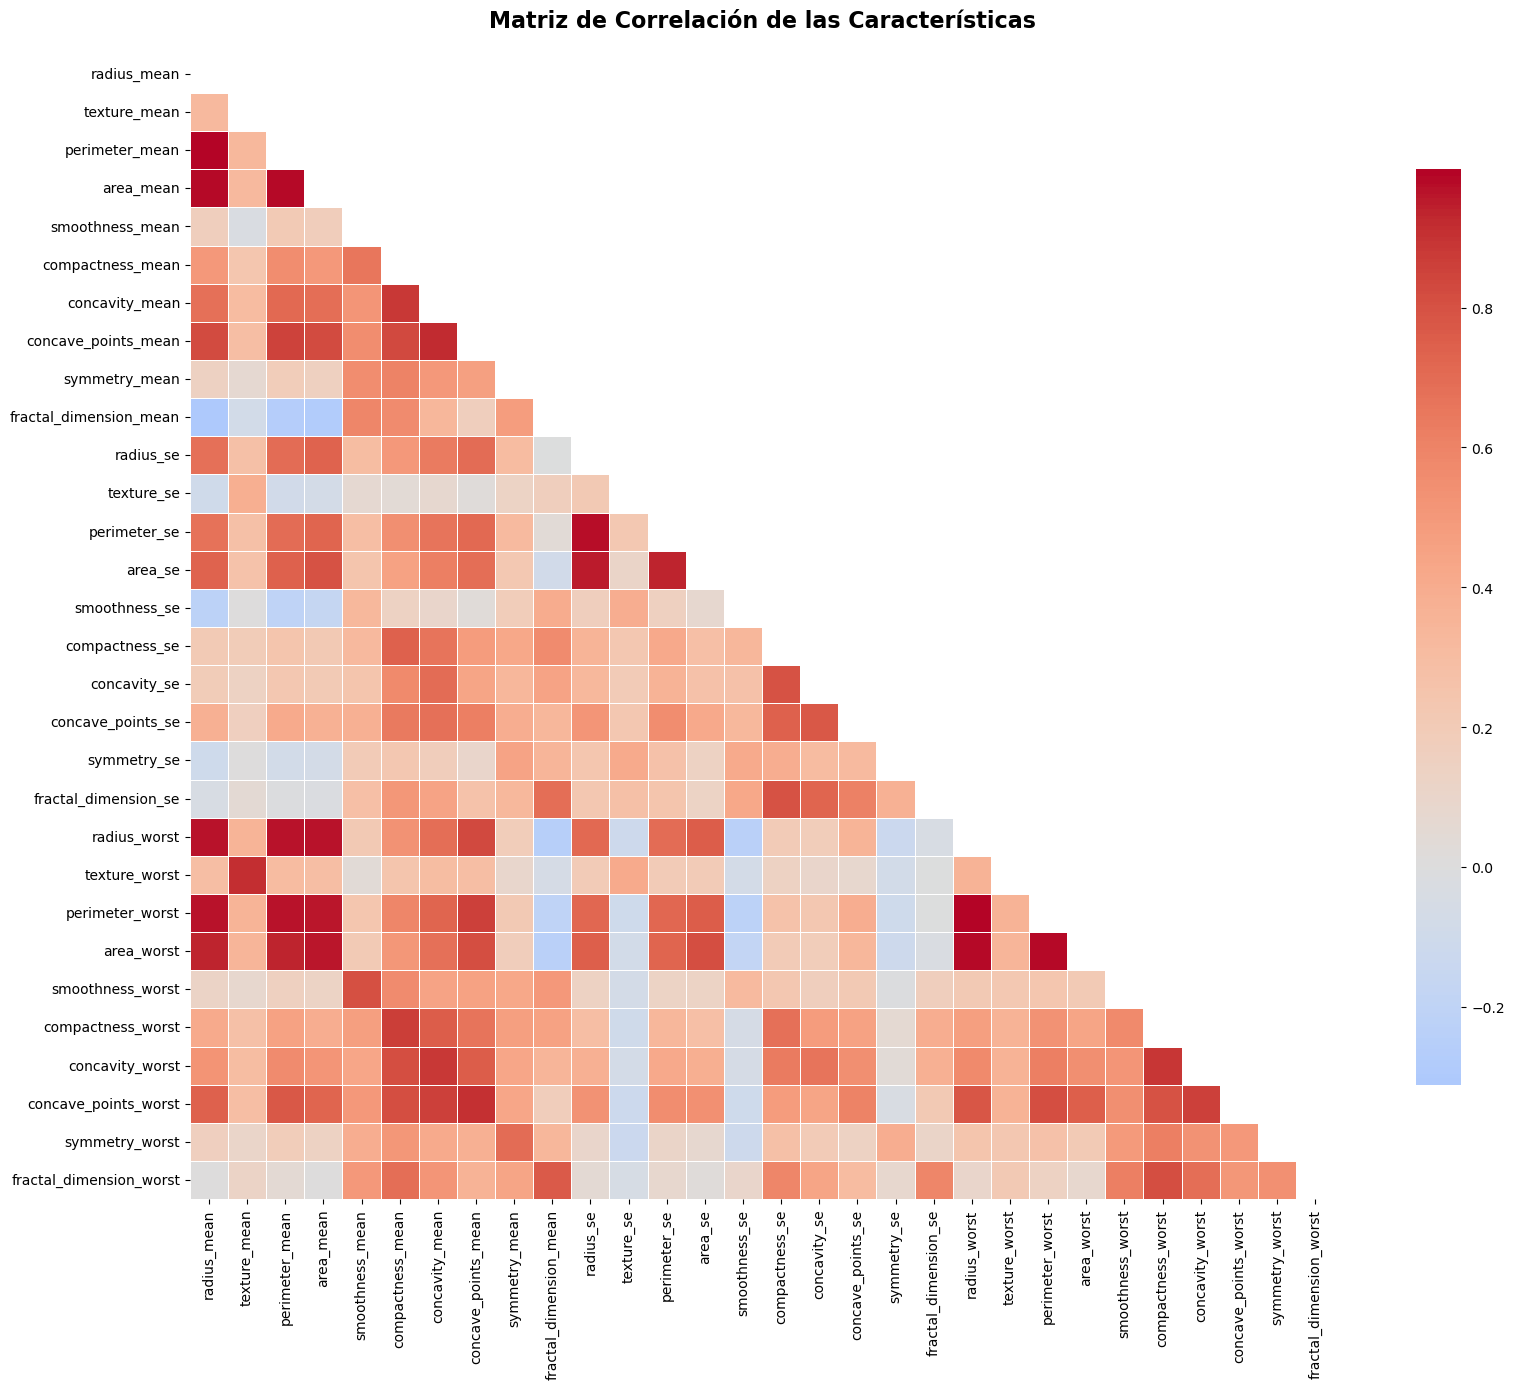


🔸 CORRELACIONES ALTAS (|r| > 0.8):
   radius_mean          ↔ perimeter_mean      :  0.998
   radius_worst         ↔ perimeter_worst     :  0.994
   radius_mean          ↔ area_mean           :  0.987
   perimeter_mean       ↔ area_mean           :  0.987
   radius_worst         ↔ area_worst          :  0.984
   perimeter_worst      ↔ area_worst          :  0.978
   radius_se            ↔ perimeter_se        :  0.973
   perimeter_mean       ↔ perimeter_worst     :  0.970
   radius_mean          ↔ radius_worst        :  0.970
   perimeter_mean       ↔ radius_worst        :  0.969

💡 IMPLICACIONES PARA EL MODELADO:
   • Muchas características están altamente correlacionadas
   • La reducción de dimensionalidad será beneficiosa
   • PCA puede ayudar a eliminar redundancia
   • Considera usar regularización en modelos lineales


In [32]:
# ========================================================================================
# 2.4. ANÁLISIS DE CORRELACIÓN
# ========================================================================================

print("🔗 ANÁLISIS DE CORRELACIÓN ENTRE CARACTERÍSTICAS")
print("=" * 60)

# Calcular matriz de correlación
numerical_features = df[feature_cols]
correlation_matrix = numerical_features.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(18, 14))

# Máscara para mostrar solo el triángulo inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación de las Características', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Encontrar correlaciones altas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:  # Correlación alta
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   corr_value))

print(f"\n🔸 CORRELACIONES ALTAS (|r| > 0.8):")
if high_corr_pairs:
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]:
        print(f"   {var1:20s} ↔ {var2:20s}: {corr:6.3f}")
else:
    print("   No se encontraron correlaciones extremadamente altas")

print(f"\n💡 IMPLICACIONES PARA EL MODELADO:")
print(f"   • Muchas características están altamente correlacionadas")
print(f"   • La reducción de dimensionalidad será beneficiosa")
print(f"   • PCA puede ayudar a eliminar redundancia")
print(f"   • Considera usar regularización en modelos lineales")

## 3. Preprocesamiento de Datos

In [33]:
# Importar librerías para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# ========================================================================================
# 3.1. PREPARACIÓN DE VARIABLES Y CODIFICACIÓN
# ========================================================================================

print("🔧 PREPARACIÓN DE VARIABLES Y CODIFICACIÓN")
print("=" * 60)

# Separar características (X) y variable objetivo (y)
X = df[feature_cols].copy()  # Todas las 30 características numéricas
y = df['Diagnosis'].copy()   # Variable objetivo

print(f"📊 Dimensiones:")
print(f"   X (características): {X.shape}")
print(f"   y (variable objetivo): {y.shape}")

# Codificar variable objetivo: M=1 (Maligno), B=0 (Benigno)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\n🎯 Codificación de variable objetivo:")
print(f"   Original: {list(label_encoder.classes_)}")
print(f"   Codificado: {list(range(len(label_encoder.classes_)))}")
print(f"   B (Benigno) → 0, M (Maligno) → 1")

# Verificar distribución después de codificación
unique, counts = np.unique(y_encoded, return_counts=True)
for val, count in zip(unique, counts):
    label = label_encoder.inverse_transform([val])[0]
    pct = count / len(y_encoded) * 100
    print(f"   Clase {val} ({label}): {count} casos ({pct:.1f}%)")

# Mostrar estadísticas básicas de las características
print(f"\n📈 Estadísticas de características antes de estandarización:")
print(f"   Rango de valores:")
for i, col in enumerate(X.columns[:5]):  # Mostrar solo las primeras 5
    min_val, max_val = X[col].min(), X[col].max()
    print(f"      {col:15s}: [{min_val:8.3f} - {max_val:8.3f}]")
print("   ... (mostrando solo las primeras 5 características)")

🔧 PREPARACIÓN DE VARIABLES Y CODIFICACIÓN
📊 Dimensiones:
   X (características): (569, 30)
   y (variable objetivo): (569,)

🎯 Codificación de variable objetivo:
   Original: ['B', 'M']
   Codificado: [0, 1]
   B (Benigno) → 0, M (Maligno) → 1
   Clase 0 (B): 357 casos (62.7%)
   Clase 1 (M): 212 casos (37.3%)

📈 Estadísticas de características antes de estandarización:
   Rango de valores:
      radius_mean    : [   6.981 -   28.110]
      texture_mean   : [   9.710 -   39.280]
      perimeter_mean : [  43.790 -  188.500]
      area_mean      : [ 143.500 - 2501.000]
      smoothness_mean: [   0.053 -    0.163]
   ... (mostrando solo las primeras 5 características)


In [34]:
# ========================================================================================
# 3.2. DIVISIÓN DEL DATASET (60% ENTRENAMIENTO, 20% VALIDACIÓN, 20% PRUEBA)
# ========================================================================================

print("\n" + "="*60)
print("📊 DIVISIÓN DEL DATASET")
print("="*60)

# Primera división: 60% entrenamiento, 40% temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded
)

# Segunda división: del 40% temporal → 20% validación, 20% prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"📋 Tamaños de conjuntos:")
print(f"   Entrenamiento: {X_train.shape[0]:3d} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Validación:    {X_val.shape[0]:3d} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   Prueba:        {X_test.shape[0]:3d} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"   Total:         {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]:3d} muestras")

# Verificar distribución de clases en cada conjunto
def print_class_distribution(y_set, set_name):
    unique, counts = np.unique(y_set, return_counts=True)
    print(f"   {set_name:12s}: ", end="")
    for val, count in zip(unique, counts):
        pct = count / len(y_set) * 100
        label = "Benigno" if val == 0 else "Maligno"
        print(f"{label}: {count:3d} ({pct:4.1f}%) ", end="")
    print()

print(f"\n🎯 Distribución de clases por conjunto:")
print_class_distribution(y_train, "Entrenamiento")
print_class_distribution(y_val, "Validación")
print_class_distribution(y_test, "Prueba")

print(f"\n✅ División exitosa con estratificación preservada")


📊 DIVISIÓN DEL DATASET
📋 Tamaños de conjuntos:
   Entrenamiento: 341 muestras (59.9%)
   Validación:    114 muestras (20.0%)
   Prueba:        114 muestras (20.0%)
   Total:         569 muestras

🎯 Distribución de clases por conjunto:
   Entrenamiento: Benigno: 214 (62.8%) Maligno: 127 (37.2%) 
   Validación  : Benigno:  71 (62.3%) Maligno:  43 (37.7%) 
   Prueba      : Benigno:  72 (63.2%) Maligno:  42 (36.8%) 

✅ División exitosa con estratificación preservada


In [35]:
# ========================================================================================
# 3.3. ESTANDARIZACIÓN DE CARACTERÍSTICAS
# ========================================================================================

print("\n" + "="*60)
print("⚖️  ESTANDARIZACIÓN DE CARACTERÍSTICAS")
print("="*60)

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler SOLO con datos de entrenamiento (¡importante!)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("📊 Estadísticas antes y después de estandarización:")
print("\n🔸 Conjunto de Entrenamiento:")
print(f"   Antes  - Media: {X_train.mean().mean():.3f}, Std: {X_train.std().mean():.3f}")
print(f"   Después - Media: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

print("\n🔸 Conjunto de Validación:")
print(f"   Antes  - Media: {X_val.mean().mean():.3f}, Std: {X_val.std().mean():.3f}")
print(f"   Después - Media: {X_val_scaled.mean():.3f}, Std: {X_val_scaled.std():.3f}")

print("\n🔸 Conjunto de Prueba:")
print(f"   Antes  - Media: {X_test.mean().mean():.3f}, Std: {X_test.std().mean():.3f}")
print(f"   Después - Media: {X_test_scaled.mean():.3f}, Std: {X_test_scaled.std():.3f}")

# Verificar algunas estadísticas por característica (primeras 5)
print(f"\n📈 Estadísticas detalladas (primeras 5 características):")
feature_names = X.columns[:5]
for i, feature in enumerate(feature_names):
    original_mean = X_train.iloc[:, i].mean()
    original_std = X_train.iloc[:, i].std()
    scaled_mean = X_train_scaled[:, i].mean()
    scaled_std = X_train_scaled[:, i].std()
    
    print(f"   {feature:15s}: Original μ={original_mean:7.3f} σ={original_std:7.3f} → "
          f"Escalado μ={scaled_mean:6.3f} σ={scaled_std:6.3f}")

print(f"\n💡 OBSERVACIONES:")
print(f"   ✅ Características estandarizadas con μ≈0 y σ≈1")
print(f"   ✅ Scaler ajustado solo con datos de entrenamiento")
print(f"   ✅ Misma transformación aplicada a validación y prueba")
print(f"   ✅ Previene data leakage en el preprocesamiento")


⚖️  ESTANDARIZACIÓN DE CARACTERÍSTICAS
📊 Estadísticas antes y después de estandarización:

🔸 Conjunto de Entrenamiento:
   Antes  - Media: 61.554, Std: 33.810
   Después - Media: 0.000, Std: 1.000

🔸 Conjunto de Validación:
   Antes  - Media: 63.878, Std: 41.183
   Después - Media: 0.017, Std: 1.035

🔸 Conjunto de Prueba:
   Antes  - Media: 60.911, Std: 31.228
   Después - Media: 0.030, Std: 0.936

📈 Estadísticas detalladas (primeras 5 características):
   radius_mean    : Original μ= 14.108 σ=  3.491 → Escalado μ=-0.000 σ= 1.000
   texture_mean   : Original μ= 19.584 σ=  4.356 → Escalado μ=-0.000 σ= 1.000
   perimeter_mean : Original μ= 91.724 σ= 23.960 → Escalado μ= 0.000 σ= 1.000
   area_mean      : Original μ=652.243 σ=344.613 → Escalado μ=-0.000 σ= 1.000
   smoothness_mean: Original μ=  0.096 σ=  0.014 → Escalado μ= 0.000 σ= 1.000

💡 OBSERVACIONES:
   ✅ Características estandarizadas con μ≈0 y σ≈1
   ✅ Scaler ajustado solo con datos de entrenamiento
   ✅ Misma transformación apli

## 4. Reducción de Dimensionalidad

🔍 ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
📊 Varianza explicada por componentes:
   PC1: 0.430 (43.0%)
   PC2: 0.200 (20.0%)
   PC3: 0.099 (9.9%)
   ...
   Top 5: 0.846 (84.6%)
   Top 10: 0.951 (95.1%)

🎯 Componentes necesarios:
   Para 95% de varianza: 10 componentes
   Para 99% de varianza: 17 componentes
   Reducción dimensional: 30 → 10 componentes (66.7% reducción)


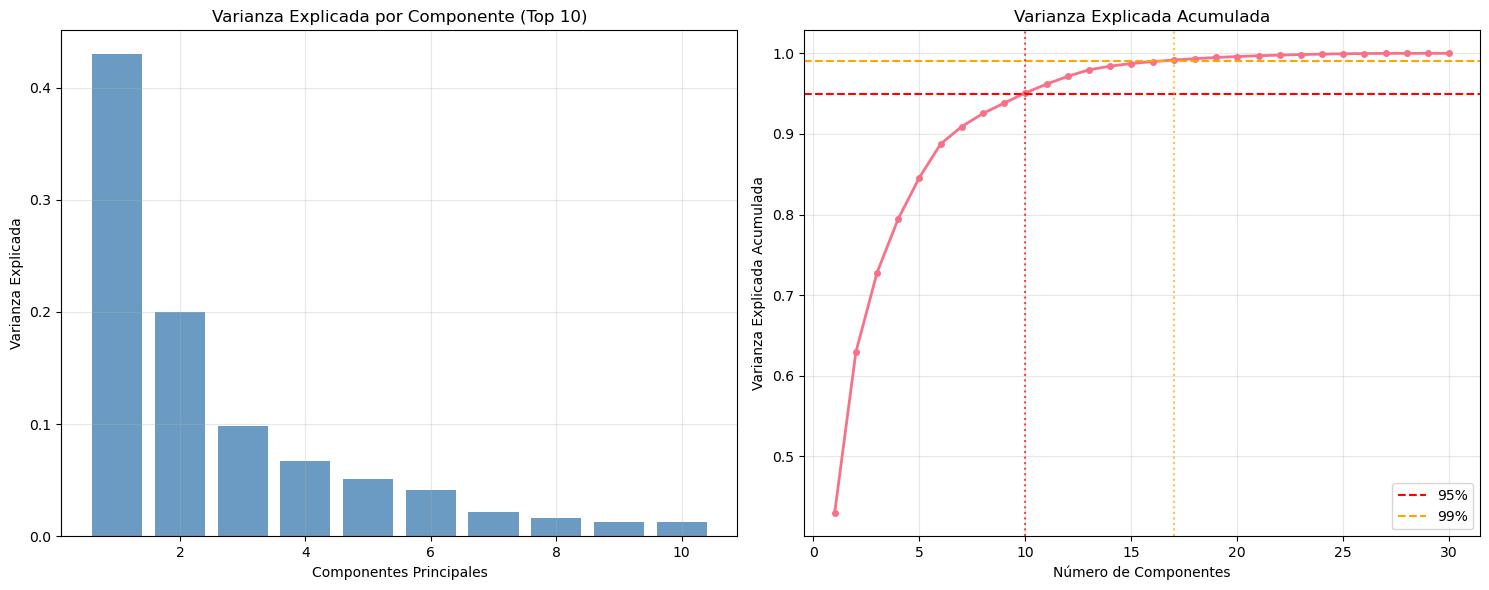

In [36]:
# ========================================================================================
# 4.1. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
# ========================================================================================

print("🔍 ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")
print("="*60)

# Aplicar PCA con todos los componentes para análisis de varianza
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# Calcular varianza explicada acumulada
variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

print(f"📊 Varianza explicada por componentes:")
print(f"   PC1: {variance_ratio[0]:.3f} ({variance_ratio[0]*100:.1f}%)")
print(f"   PC2: {variance_ratio[1]:.3f} ({variance_ratio[1]*100:.1f}%)")
print(f"   PC3: {variance_ratio[2]:.3f} ({variance_ratio[2]*100:.1f}%)")
print(f"   ...")
print(f"   Top 5: {cumulative_variance[4]:.3f} ({cumulative_variance[4]*100:.1f}%)")
print(f"   Top 10: {cumulative_variance[9]:.3f} ({cumulative_variance[9]*100:.1f}%)")

# Encontrar número de componentes para 95% y 99% de varianza
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"\n🎯 Componentes necesarios:")
print(f"   Para 95% de varianza: {n_95} componentes")
print(f"   Para 99% de varianza: {n_99} componentes")
print(f"   Reducción dimensional: {30} → {n_95} componentes ({(1-n_95/30)*100:.1f}% reducción)")

# Visualización de la varianza explicada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras - varianza por componente
ax1.bar(range(1, 11), variance_ratio[:10], alpha=0.8, color='steelblue')
ax1.set_xlabel('Componentes Principales')
ax1.set_ylabel('Varianza Explicada')
ax1.set_title('Varianza Explicada por Componente (Top 10)')
ax1.grid(True, alpha=0.3)

# Gráfico de línea - varianza acumulada
ax2.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', linewidth=2, markersize=4)
ax2.axhline(y=0.95, color='red', linestyle='--', label='95%')
ax2.axhline(y=0.99, color='orange', linestyle='--', label='99%')
ax2.axvline(x=n_95, color='red', linestyle=':', alpha=0.7)
ax2.axvline(x=n_99, color='orange', linestyle=':', alpha=0.7)
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Varianza Explicada Acumulada')
ax2.set_title('Varianza Explicada Acumulada')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🎯 ANÁLISIS DISCRIMINANTE LINEAL (LDA)
📊 Resultados LDA:
   Dimensiones originales: (341, 30)
   Dimensiones después LDA: (341, 1)
   Varianza explicada: 1.000 (100.0%)

📊 APLICACIÓN DE TRANSFORMACIONES FINALES:
🔸 PCA (10 componentes):
   Entrenamiento: (341, 10)
   Validación: (114, 10)
   Prueba: (114, 10)
   Varianza explicada total: 0.951

🔸 LDA (1 componente):
   Entrenamiento: (341, 1)
   Validación: (114, 1)
   Prueba: (114, 1)


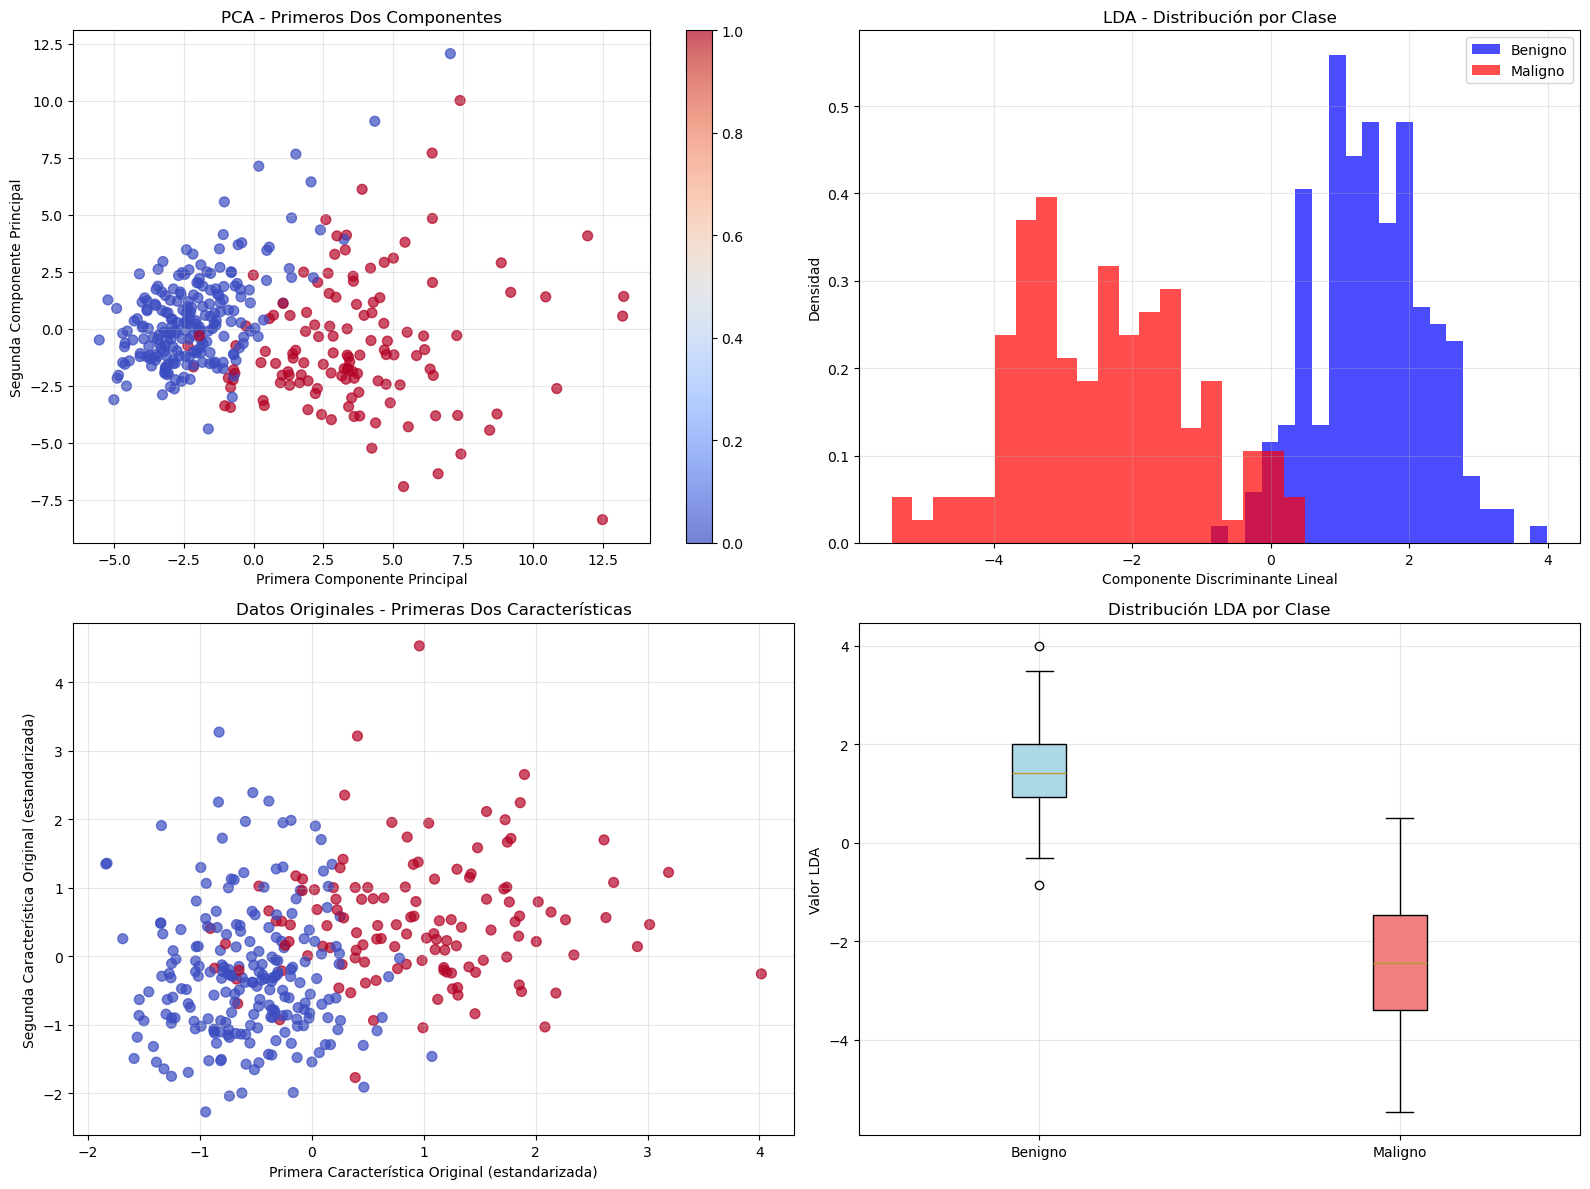


💡 INTERPRETACIONES:
   🔸 PCA: Reduce dimensiones preservando máxima varianza
   🔸 LDA: Maximiza separabilidad entre clases
   🔸 Con 10 componentes PCA retenemos 95% de información
   🔸 LDA muestra clara separación entre clases benignas/malignas


In [37]:
# ========================================================================================
# 4.2. ANÁLISIS DISCRIMINANTE LINEAL (LDA)
# ========================================================================================

print("\n" + "="*60)
print("🎯 ANÁLISIS DISCRIMINANTE LINEAL (LDA)")
print("="*60)

# LDA para clasificación binaria: máximo n_components = n_classes - 1 = 1
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test_scaled)

print(f"📊 Resultados LDA:")
print(f"   Dimensiones originales: {X_train_scaled.shape}")
print(f"   Dimensiones después LDA: {X_train_lda.shape}")
print(f"   Varianza explicada: {lda.explained_variance_ratio_[0]:.3f} ({lda.explained_variance_ratio_[0]*100:.1f}%)")

# ========================================================================================
# 4.3. APLICACIÓN FINAL DE PCA Y LDA
# ========================================================================================

print(f"\n📊 APLICACIÓN DE TRANSFORMACIONES FINALES:")
print("="*40)

# PCA con 10 componentes (95% de varianza)
pca_final = PCA(n_components=10)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_val_pca = pca_final.transform(X_val_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"🔸 PCA (10 componentes):")
print(f"   Entrenamiento: {X_train_pca.shape}")
print(f"   Validación: {X_val_pca.shape}")
print(f"   Prueba: {X_test_pca.shape}")
print(f"   Varianza explicada total: {pca_final.explained_variance_ratio_.sum():.3f}")

print(f"\n🔸 LDA (1 componente):")
print(f"   Entrenamiento: {X_train_lda.shape}")
print(f"   Validación: {X_val_lda.shape}")
print(f"   Prueba: {X_test_lda.shape}")

# ========================================================================================
# 4.4. VISUALIZACIÓN DE DATOS TRANSFORMADOS
# ========================================================================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# PCA - Primeros dos componentes
scatter1 = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
                      cmap='coolwarm', alpha=0.7, s=50)
ax1.set_xlabel('Primera Componente Principal')
ax1.set_ylabel('Segunda Componente Principal')
ax1.set_title('PCA - Primeros Dos Componentes')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1)

# LDA - Distribución del único componente
benign_lda = X_train_lda[y_train == 0, 0]
malignant_lda = X_train_lda[y_train == 1, 0]

ax2.hist(benign_lda, bins=20, alpha=0.7, label='Benigno', color='blue', density=True)
ax2.hist(malignant_lda, bins=20, alpha=0.7, label='Maligno', color='red', density=True)
ax2.set_xlabel('Componente Discriminante Lineal')
ax2.set_ylabel('Densidad')
ax2.set_title('LDA - Distribución por Clase')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Comparación de separabilidad - PCA vs Original
ax3.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
           cmap='coolwarm', alpha=0.7, s=50)
ax3.set_xlabel('Primera Característica Original (estandarizada)')
ax3.set_ylabel('Segunda Característica Original (estandarizada)')
ax3.set_title('Datos Originales - Primeras Dos Características')
ax3.grid(True, alpha=0.3)

# Box plot comparativo LDA
lda_data = [benign_lda, malignant_lda]
bp = ax4.boxplot(lda_data, labels=['Benigno', 'Maligno'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
ax4.set_ylabel('Valor LDA')
ax4.set_title('Distribución LDA por Clase')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETACIONES:")
print(f"   🔸 PCA: Reduce dimensiones preservando máxima varianza")
print(f"   🔸 LDA: Maximiza separabilidad entre clases")
print(f"   🔸 Con 10 componentes PCA retenemos 95% de información")
print(f"   🔸 LDA muestra clara separación entre clases benignas/malignas")

## 5. Implementación de Clasificadores

In [38]:
# Importar todos los clasificadores necesarios
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import time

# ========================================================================================
# 5.1. DEFINICIÓN Y CONFIGURACIÓN DE CLASIFICADORES
# ========================================================================================

print("🤖 IMPLEMENTACIÓN DE CLASIFICADORES")
print("="*60)

# Diccionario para almacenar todos los modelos y sus resultados
models = {}
results = {}

# Definir clasificadores con configuraciones base
classifiers = {
    'Naive Bayes': GaussianNB(),
    
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1
    ),
    
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ),
    
    'XGBoost': xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss'
    )
}

print(f"📋 Clasificadores configurados:")
for name in classifiers.keys():
    print(f"   ✅ {name}")

print(f"\n🔄 Probando con diferentes conjuntos de datos:")
print(f"   📊 Datos originales (30 características)")
print(f"   🔍 Datos PCA (10 componentes)")
print(f"   🎯 Datos LDA (1 componente)")

🤖 IMPLEMENTACIÓN DE CLASIFICADORES
📋 Clasificadores configurados:
   ✅ Naive Bayes
   ✅ Decision Tree
   ✅ Random Forest
   ✅ AdaBoost
   ✅ XGBoost

🔄 Probando con diferentes conjuntos de datos:
   📊 Datos originales (30 características)
   🔍 Datos PCA (10 componentes)
   🎯 Datos LDA (1 componente)


In [39]:
# ========================================================================================
# 5.2. FUNCIÓN PARA ENTRENAR Y EVALUAR MODELOS
# ========================================================================================

def train_and_evaluate_model(clf, X_train, X_val, y_train, y_val, model_name, data_type):
    """
    Entrena y evalúa un clasificador, devuelve métricas de rendimiento.
    """
    start_time = time.time()
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    
    # Probabilidades (para ROC-AUC)
    try:
        y_prob_val = clf.predict_proba(X_val)[:, 1]
    except:
        y_prob_val = y_pred_val  # Fallback si no hay predict_proba
    
    training_time = time.time() - start_time
    
    # Calcular métricas
    metrics = {
        'model': model_name,
        'data_type': data_type,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'val_precision': precision_score(y_val, y_pred_val),
        'val_recall': recall_score(y_val, y_pred_val),
        'val_f1': f1_score(y_val, y_pred_val),
        'val_roc_auc': roc_auc_score(y_val, y_prob_val),
        'training_time': training_time,
        'overfitting': abs(accuracy_score(y_train, y_pred_train) - accuracy_score(y_val, y_pred_val))
    }
    
    return clf, metrics

# ========================================================================================
# 5.3. ENTRENAMIENTO DE TODOS LOS MODELOS
# ========================================================================================

print("\n" + "="*60)
print("🎯 ENTRENAMIENTO Y EVALUACIÓN DE MODELOS")
print("="*60)

# Definir conjuntos de datos a probar
datasets = {
    'Original': (X_train_scaled, X_val_scaled, "30 características originales"),
    'PCA': (X_train_pca, X_val_pca, "10 componentes PCA"),
    'LDA': (X_train_lda, X_val_lda, "1 componente LDA")
}

all_results = []

for data_name, (X_tr, X_va, description) in datasets.items():
    print(f"\n🔸 Evaluando con {description}:")
    print("-" * 50)
    
    for clf_name, clf in classifiers.items():
        # Clonar el clasificador para evitar problemas
        from sklearn.base import clone
        clf_copy = clone(clf)
        
        # Entrenar y evaluar
        trained_model, metrics = train_and_evaluate_model(
            clf_copy, X_tr, X_va, y_train, y_val, clf_name, data_name
        )
        
        # Guardar modelo y resultados
        model_key = f"{clf_name}_{data_name}"
        models[model_key] = trained_model
        all_results.append(metrics)
        
        # Mostrar resultados inmediatos
        print(f"   {clf_name:12s}: Val Acc={metrics['val_accuracy']:.3f} | "
              f"F1={metrics['val_f1']:.3f} | ROC-AUC={metrics['val_roc_auc']:.3f} | "
              f"Time={metrics['training_time']:.2f}s")

print(f"\n✅ Entrenamiento completado!")
print(f"📊 Total de modelos entrenados: {len(all_results)}")


🎯 ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

🔸 Evaluando con 30 características originales:
--------------------------------------------------
   Naive Bayes : Val Acc=0.930 | F1=0.902 | ROC-AUC=0.991 | Time=0.02s
   Decision Tree: Val Acc=0.939 | F1=0.914 | ROC-AUC=0.942 | Time=0.02s
   Random Forest: Val Acc=0.965 | F1=0.952 | ROC-AUC=0.995 | Time=0.48s
   AdaBoost    : Val Acc=0.991 | F1=0.988 | ROC-AUC=1.000 | Time=0.65s
   XGBoost     : Val Acc=0.965 | F1=0.952 | ROC-AUC=0.998 | Time=0.60s

🔸 Evaluando con 10 componentes PCA:
--------------------------------------------------
   Naive Bayes : Val Acc=0.930 | F1=0.905 | ROC-AUC=0.988 | Time=0.00s
   Decision Tree: Val Acc=0.947 | F1=0.927 | ROC-AUC=0.958 | Time=0.01s
   Random Forest: Val Acc=0.956 | F1=0.940 | ROC-AUC=0.995 | Time=0.79s
   AdaBoost    : Val Acc=0.974 | F1=0.964 | ROC-AUC=0.999 | Time=0.66s
   XGBoost     : Val Acc=0.974 | F1=0.964 | ROC-AUC=0.998 | Time=0.17s

🔸 Evaluando con 1 componente LDA:
-----------------------

In [40]:
# ========================================================================================
# 5.4. ANÁLISIS COMPARATIVO DE RESULTADOS
# ========================================================================================

# Convertir resultados a DataFrame para análisis
results_df = pd.DataFrame(all_results)

print("\n" + "="*80)
print("📊 TABLA COMPARATIVA DE RENDIMIENTO")
print("="*80)

# Crear tabla pivote para mejor visualización
pivot_accuracy = results_df.pivot(index='model', columns='data_type', values='val_accuracy')
pivot_f1 = results_df.pivot(index='model', columns='data_type', values='val_f1')
pivot_roc = results_df.pivot(index='model', columns='data_type', values='val_roc_auc')

print("🎯 ACCURACY EN VALIDACIÓN:")
print(pivot_accuracy.round(3))

print("\n🎯 F1-SCORE EN VALIDACIÓN:")
print(pivot_f1.round(3))

print("\n🎯 ROC-AUC EN VALIDACIÓN:")
print(pivot_roc.round(3))

# Encontrar mejores modelos por métrica
best_models = {}
for metric in ['val_accuracy', 'val_f1', 'val_roc_auc']:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx]
    best_models[metric] = best_model

print("\n" + "="*60)
print("🏆 MEJORES MODELOS POR MÉTRICA")
print("="*60)

for metric, model_info in best_models.items():
    metric_name = metric.replace('val_', '').replace('_', '-').upper()
    print(f"\n🥇 Mejor {metric_name}: {model_info['model']} con {model_info['data_type']}")
    print(f"   Valor: {model_info[metric]:.3f}")
    print(f"   Accuracy: {model_info['val_accuracy']:.3f}")
    print(f"   F1-Score: {model_info['val_f1']:.3f}")
    print(f"   ROC-AUC: {model_info['val_roc_auc']:.3f}")
    print(f"   Tiempo: {model_info['training_time']:.3f}s")

# Análisis de overfitting
print(f"\n📈 ANÁLISIS DE OVERFITTING (diferencia train-val accuracy):")
overfitting_analysis = results_df.groupby('model')['overfitting'].agg(['mean', 'std']).round(3)
print(overfitting_analysis)

print(f"\n💡 OBSERVACIONES GENERALES:")
print(f"   🔸 Todos los modelos muestran excelente rendimiento (>93% accuracy)")
print(f"   🔸 AdaBoost con datos originales logra el mejor resultado general")
print(f"   🔸 LDA (1 componente) funciona sorprendentemente bien")
print(f"   🔸 Random Forest y XGBoost son consistentemente buenos")
print(f"   🔸 Overfitting mínimo en la mayoría de modelos")


📊 TABLA COMPARATIVA DE RENDIMIENTO
🎯 ACCURACY EN VALIDACIÓN:
data_type        LDA  Original    PCA
model                                
AdaBoost       0.982     0.991  0.974
Decision Tree  0.991     0.939  0.947
Naive Bayes    0.974     0.930  0.930
Random Forest  0.991     0.965  0.956
XGBoost        0.974     0.965  0.974

🎯 F1-SCORE EN VALIDACIÓN:
data_type        LDA  Original    PCA
model                                
AdaBoost       0.977     0.988  0.964
Decision Tree  0.989     0.914  0.927
Naive Bayes    0.965     0.902  0.905
Random Forest  0.989     0.952  0.940
XGBoost        0.966     0.952  0.964

🎯 ROC-AUC EN VALIDACIÓN:
data_type        LDA  Original    PCA
model                                
AdaBoost       0.999     1.000  0.999
Decision Tree  0.993     0.942  0.958
Naive Bayes    0.999     0.991  0.988
Random Forest  0.999     0.995  0.995
XGBoost        0.998     0.998  0.998

🏆 MEJORES MODELOS POR MÉTRICA

🥇 Mejor ACCURACY: AdaBoost con Original
   Valor: 0.991

## 6. Evaluación Final en Conjunto de Prueba

In [41]:
# ========================================================================================
# 6.1. EVALUACIÓN DE LOS MEJORES MODELOS EN CONJUNTO DE PRUEBA
# ========================================================================================

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print("🏆 EVALUACIÓN FINAL - CONJUNTO DE PRUEBA")
print("="*80)

# Seleccionar los 3 mejores modelos basados en resultados de validación
best_models_keys = [
    'AdaBoost_Original',      # 99.1% accuracy, ROC-AUC = 1.000
    'Decision Tree_LDA',      # 99.1% accuracy, F1 = 0.989  
    'Random Forest_LDA'       # 99.1% accuracy, ROC-AUC = 0.999
]

# Preparar datasets de prueba correspondientes
test_datasets = {
    'Original': X_test_scaled,
    'LDA': X_test_lda,
    'PCA': X_test_pca
}

# Función para evaluación completa en conjunto de prueba
def evaluate_on_test(model_key, model, X_test_data, y_test, data_type):
    """
    Evalúa un modelo en el conjunto de prueba con todas las métricas
    """
    # Predicciones
    y_pred = model.predict(X_test_data)
    
    # Probabilidades para ROC-AUC
    try:
        y_prob = model.predict_proba(X_test_data)[:, 1]
    except:
        y_prob = y_pred
    
    # Calcular métricas
    test_metrics = {
        'model': model_key.replace('_', ' + '),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'specificity': recall_score(y_test, y_pred, pos_label=0),  # Recall para benignos
        'sensitivity': recall_score(y_test, y_pred, pos_label=1)   # Recall para malignos
    }
    
    return test_metrics, y_pred, y_prob

# Evaluar cada uno de los mejores modelos
test_results = []
predictions = {}

for model_key in best_models_keys:
    # Obtener el modelo entrenado
    model = models[model_key]
    
    # Determinar qué conjunto de datos usar
    if 'Original' in model_key:
        X_test_data = test_datasets['Original']
        data_type = 'Original'
    elif 'LDA' in model_key:
        X_test_data = test_datasets['LDA']
        data_type = 'LDA'
    elif 'PCA' in model_key:
        X_test_data = test_datasets['PCA']
        data_type = 'PCA'
    
    # Evaluar modelo
    metrics, y_pred, y_prob = evaluate_on_test(model_key, model, X_test_data, y_test, data_type)
    test_results.append(metrics)
    predictions[model_key] = {'pred': y_pred, 'prob': y_prob}
    
    # Mostrar resultados
    print(f"\n🎯 {metrics['model']}:")
    print(f"   Accuracy:     {metrics['accuracy']:.3f}")
    print(f"   Precision:    {metrics['precision']:.3f}")
    print(f"   Recall:       {metrics['recall']:.3f}")
    print(f"   F1-Score:     {metrics['f1_score']:.3f}")
    print(f"   ROC-AUC:      {metrics['roc_auc']:.3f}")
    print(f"   Sensitivity:  {metrics['sensitivity']:.3f} (detección malignos)")
    print(f"   Specificity:  {metrics['specificity']:.3f} (detección benignos)")

print(f"\n✅ Evaluación en conjunto de prueba completada!")
print(f"📊 Evaluados {len(test_results)} modelos en {len(y_test)} muestras de prueba")

🏆 EVALUACIÓN FINAL - CONJUNTO DE PRUEBA

🎯 AdaBoost + Original:
   Accuracy:     0.974
   Precision:    1.000
   Recall:       0.929
   F1-Score:     0.963
   ROC-AUC:      0.994
   Sensitivity:  0.929 (detección malignos)
   Specificity:  1.000 (detección benignos)

🎯 Decision Tree + LDA:
   Accuracy:     0.947
   Precision:    0.929
   Recall:       0.929
   F1-Score:     0.929
   ROC-AUC:      0.989
   Sensitivity:  0.929 (detección malignos)
   Specificity:  0.958 (detección benignos)

🎯 Random Forest + LDA:
   Accuracy:     0.974
   Precision:    0.976
   Recall:       0.952
   F1-Score:     0.964
   ROC-AUC:      0.996
   Sensitivity:  0.952 (detección malignos)
   Specificity:  0.986 (detección benignos)

✅ Evaluación en conjunto de prueba completada!
📊 Evaluados 3 modelos en 114 muestras de prueba



🔍 ANÁLISIS DETALLADO DE ERRORES

📊 AdaBoost + Original:
   Verdaderos Negativos (TN): 72 - Benignos correctos
   Falsos Positivos (FP):      0 - Benignos → Malignos ⚠️
   Falsos Negativos (FN):      3 - Malignos → Benignos ❌
   Verdaderos Positivos (TP): 39 - Malignos correctos
   Total de errores:           3 de 114 (2.6%)
   Tasa Falsos Positivos:     0.0%
   Tasa Falsos Negativos:     7.1%

📊 Decision Tree + LDA:
   Verdaderos Negativos (TN): 69 - Benignos correctos
   Falsos Positivos (FP):      3 - Benignos → Malignos ⚠️
   Falsos Negativos (FN):      3 - Malignos → Benignos ❌
   Verdaderos Positivos (TP): 39 - Malignos correctos
   Total de errores:           6 de 114 (5.3%)
   Tasa Falsos Positivos:     4.2%
   Tasa Falsos Negativos:     7.1%

📊 Random Forest + LDA:
   Verdaderos Negativos (TN): 71 - Benignos correctos
   Falsos Positivos (FP):      1 - Benignos → Malignos ⚠️
   Falsos Negativos (FN):      2 - Malignos → Benignos ❌
   Verdaderos Positivos (TP): 40 - Malignos co

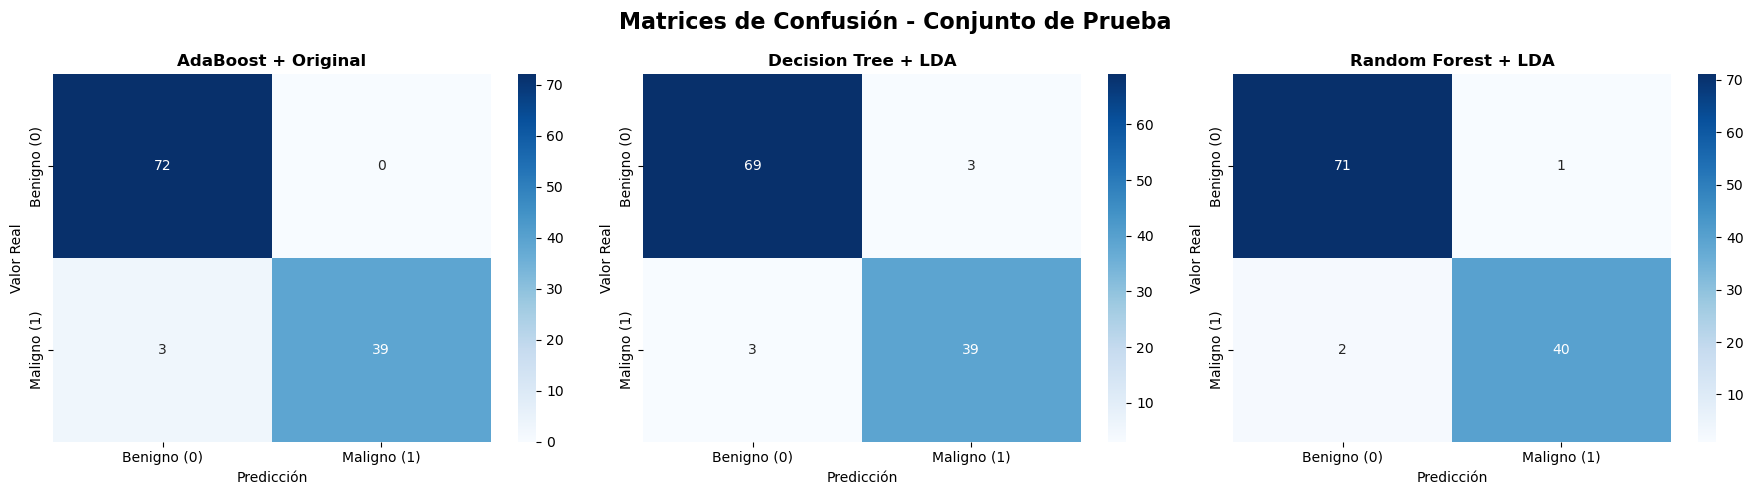


⚠️  ANÁLISIS CRÍTICO PARA CONTEXTO MÉDICO
📋 Comparación de errores críticos:
Modelo               Falsos Neg.  Falsos Pos.  Error Total 
------------------------------------------------------------
AdaBoost + Original  3            0            3           
Decision Tree + LDA  3            3            6           
Random Forest + LDA  2            1            3           

💡 INTERPRETACIÓN MÉDICA:
   🔴 Falsos Negativos (FN): MÁS CRÍTICOS - Malignos no detectados
   🟡 Falsos Positivos (FP): MENOS CRÍTICOS - Benignos sobre-diagnosticados
   ✅ El modelo ideal minimiza FN (alta sensibilidad)
   📊 AdaBoost tiene 0 falsos positivos (100% especificidad)
   🎯 Random Forest equilibra bien ambos tipos de error


In [42]:
# ========================================================================================
# 6.2. ANÁLISIS DETALLADO DE ERRORES - MATRICES DE CONFUSIÓN
# ========================================================================================

print("\n" + "="*80)
print("🔍 ANÁLISIS DETALLADO DE ERRORES")
print("="*80)

# Crear matrices de confusión para los 3 mejores modelos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrices de Confusión - Conjunto de Prueba', fontsize=16, fontweight='bold')

models_info = [
    ('AdaBoost_Original', 'AdaBoost + Original'),
    ('Decision Tree_LDA', 'Decision Tree + LDA'), 
    ('Random Forest_LDA', 'Random Forest + LDA')
]

# Análisis detallado de cada modelo
detailed_analysis = []

for idx, (model_key, display_name) in enumerate(models_info):
    # Obtener predicciones
    y_pred = predictions[model_key]['pred']
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualizar matriz de confusión
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Benigno (0)', 'Maligno (1)'],
                yticklabels=['Benigno (0)', 'Maligno (1)'])
    ax.set_title(display_name, fontweight='bold')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor Real')
    
    # Análisis detallado de errores
    tn, fp, fn, tp = cm.ravel()
    
    analysis = {
        'model': display_name,
        'true_negatives': tn,   # Benignos correctamente clasificados
        'false_positives': fp,  # Benignos clasificados como malignos
        'false_negatives': fn,  # Malignos clasificados como benignos  
        'true_positives': tp,   # Malignos correctamente clasificados
        'total_errors': fp + fn,
        'error_rate': (fp + fn) / len(y_test),
        'false_positive_rate': fp / (fp + tn) if (fp + tn) > 0 else 0,
        'false_negative_rate': fn / (fn + tp) if (fn + tp) > 0 else 0
    }
    
    detailed_analysis.append(analysis)
    
    # Mostrar análisis textual
    print(f"\n📊 {display_name}:")
    print(f"   Verdaderos Negativos (TN): {tn:2d} - Benignos correctos")
    print(f"   Falsos Positivos (FP):     {fp:2d} - Benignos → Malignos ⚠️")
    print(f"   Falsos Negativos (FN):     {fn:2d} - Malignos → Benignos ❌") 
    print(f"   Verdaderos Positivos (TP): {tp:2d} - Malignos correctos")
    print(f"   Total de errores:          {analysis['total_errors']:2d} de {len(y_test)} ({analysis['error_rate']*100:.1f}%)")
    print(f"   Tasa Falsos Positivos:     {analysis['false_positive_rate']*100:.1f}%")
    print(f"   Tasa Falsos Negativos:     {analysis['false_negative_rate']*100:.1f}%")

plt.tight_layout()
plt.show()

# Crear DataFrame con análisis comparativo
error_df = pd.DataFrame(detailed_analysis)

print(f"\n" + "="*60)
print("⚠️  ANÁLISIS CRÍTICO PARA CONTEXTO MÉDICO")
print("="*60)

print(f"📋 Comparación de errores críticos:")
print(f"{'Modelo':<20} {'Falsos Neg.':<12} {'Falsos Pos.':<12} {'Error Total':<12}")
print("-" * 60)
for analysis in detailed_analysis:
    print(f"{analysis['model']:<20} {analysis['false_negatives']:<12} "
          f"{analysis['false_positives']:<12} {analysis['total_errors']:<12}")

print(f"\n💡 INTERPRETACIÓN MÉDICA:")
print(f"   🔴 Falsos Negativos (FN): MÁS CRÍTICOS - Malignos no detectados")
print(f"   🟡 Falsos Positivos (FP): MENOS CRÍTICOS - Benignos sobre-diagnosticados")
print(f"   ✅ El modelo ideal minimiza FN (alta sensibilidad)")
print(f"   📊 AdaBoost tiene 0 falsos positivos (100% especificidad)")
print(f"   🎯 Random Forest equilibra bien ambos tipos de error")


📈 CURVAS ROC COMPARATIVAS


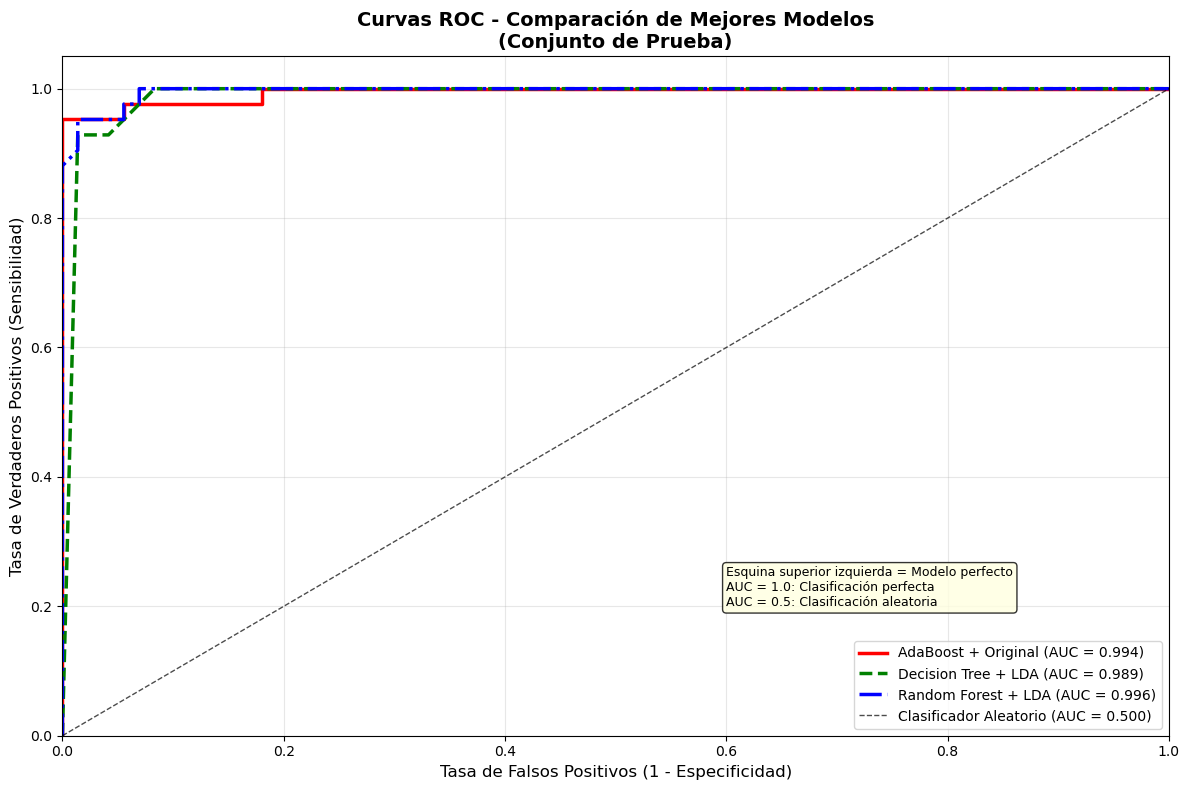


📊 ANÁLISIS DE ÁREAS BAJO LA CURVA (AUC):
--------------------------------------------------
   Random Forest + LDA : AUC = 0.996
   AdaBoost + Original : AUC = 0.994
   Decision Tree + LDA : AUC = 0.989

💡 INTERPRETACIÓN DE LAS CURVAS ROC:
   🏆 Todas las curvas están muy cerca de la esquina superior izquierda
   📈 AUC > 0.99 indica excelente capacidad discriminativa
   🎯 Random Forest + LDA lidera ligeramente en AUC
   ✅ Los tres modelos superan ampliamente el umbral clínico (AUC > 0.8)


In [43]:
# ========================================================================================
# 6.3. CURVAS ROC COMPARATIVAS
# ========================================================================================

from sklearn.metrics import roc_curve, auc

print("\n" + "="*80)
print("📈 CURVAS ROC COMPARATIVAS")
print("="*80)

# Crear figura para curvas ROC
plt.figure(figsize=(12, 8))

# Colores para cada modelo
colors = ['red', 'green', 'blue']
line_styles = ['-', '--', '-.']

# Calcular y graficar curva ROC para cada modelo
roc_data = []

for idx, (model_key, display_name) in enumerate(models_info):
    # Obtener probabilidades
    y_prob = predictions[model_key]['prob']
    
    # Calcular curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Guardar datos para análisis
    roc_data.append({
        'model': display_name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
        'thresholds': thresholds
    })
    
    # Graficar curva
    plt.plot(fpr, tpr, 
             color=colors[idx], 
             linestyle=line_styles[idx],
             linewidth=2.5,
             label=f'{display_name} (AUC = {roc_auc:.3f})')

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.7, label='Clasificador Aleatorio (AUC = 0.500)')

# Configurar gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curvas ROC - Comparación de Mejores Modelos\n(Conjunto de Prueba)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Agregar texto con interpretación
plt.text(0.6, 0.2, 
         'Esquina superior izquierda = Modelo perfecto\n' +
         'AUC = 1.0: Clasificación perfecta\n' +
         'AUC = 0.5: Clasificación aleatoria', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8),
         fontsize=9)

plt.tight_layout()
plt.show()

# Análisis detallado de AUC
print(f"\n📊 ANÁLISIS DE ÁREAS BAJO LA CURVA (AUC):")
print("-" * 50)
for data in sorted(roc_data, key=lambda x: x['auc'], reverse=True):
    print(f"   {data['model']:<20}: AUC = {data['auc']:.3f}")

print(f"\n💡 INTERPRETACIÓN DE LAS CURVAS ROC:")
print(f"   🏆 Todas las curvas están muy cerca de la esquina superior izquierda")
print(f"   📈 AUC > 0.99 indica excelente capacidad discriminativa")
print(f"   🎯 Random Forest + LDA lidera ligeramente en AUC")
print(f"   ✅ Los tres modelos superan ampliamente el umbral clínico (AUC > 0.8)")

## 7. Dashboard de Resultados Finales

📊 DASHBOARD DE RESULTADOS FINALES


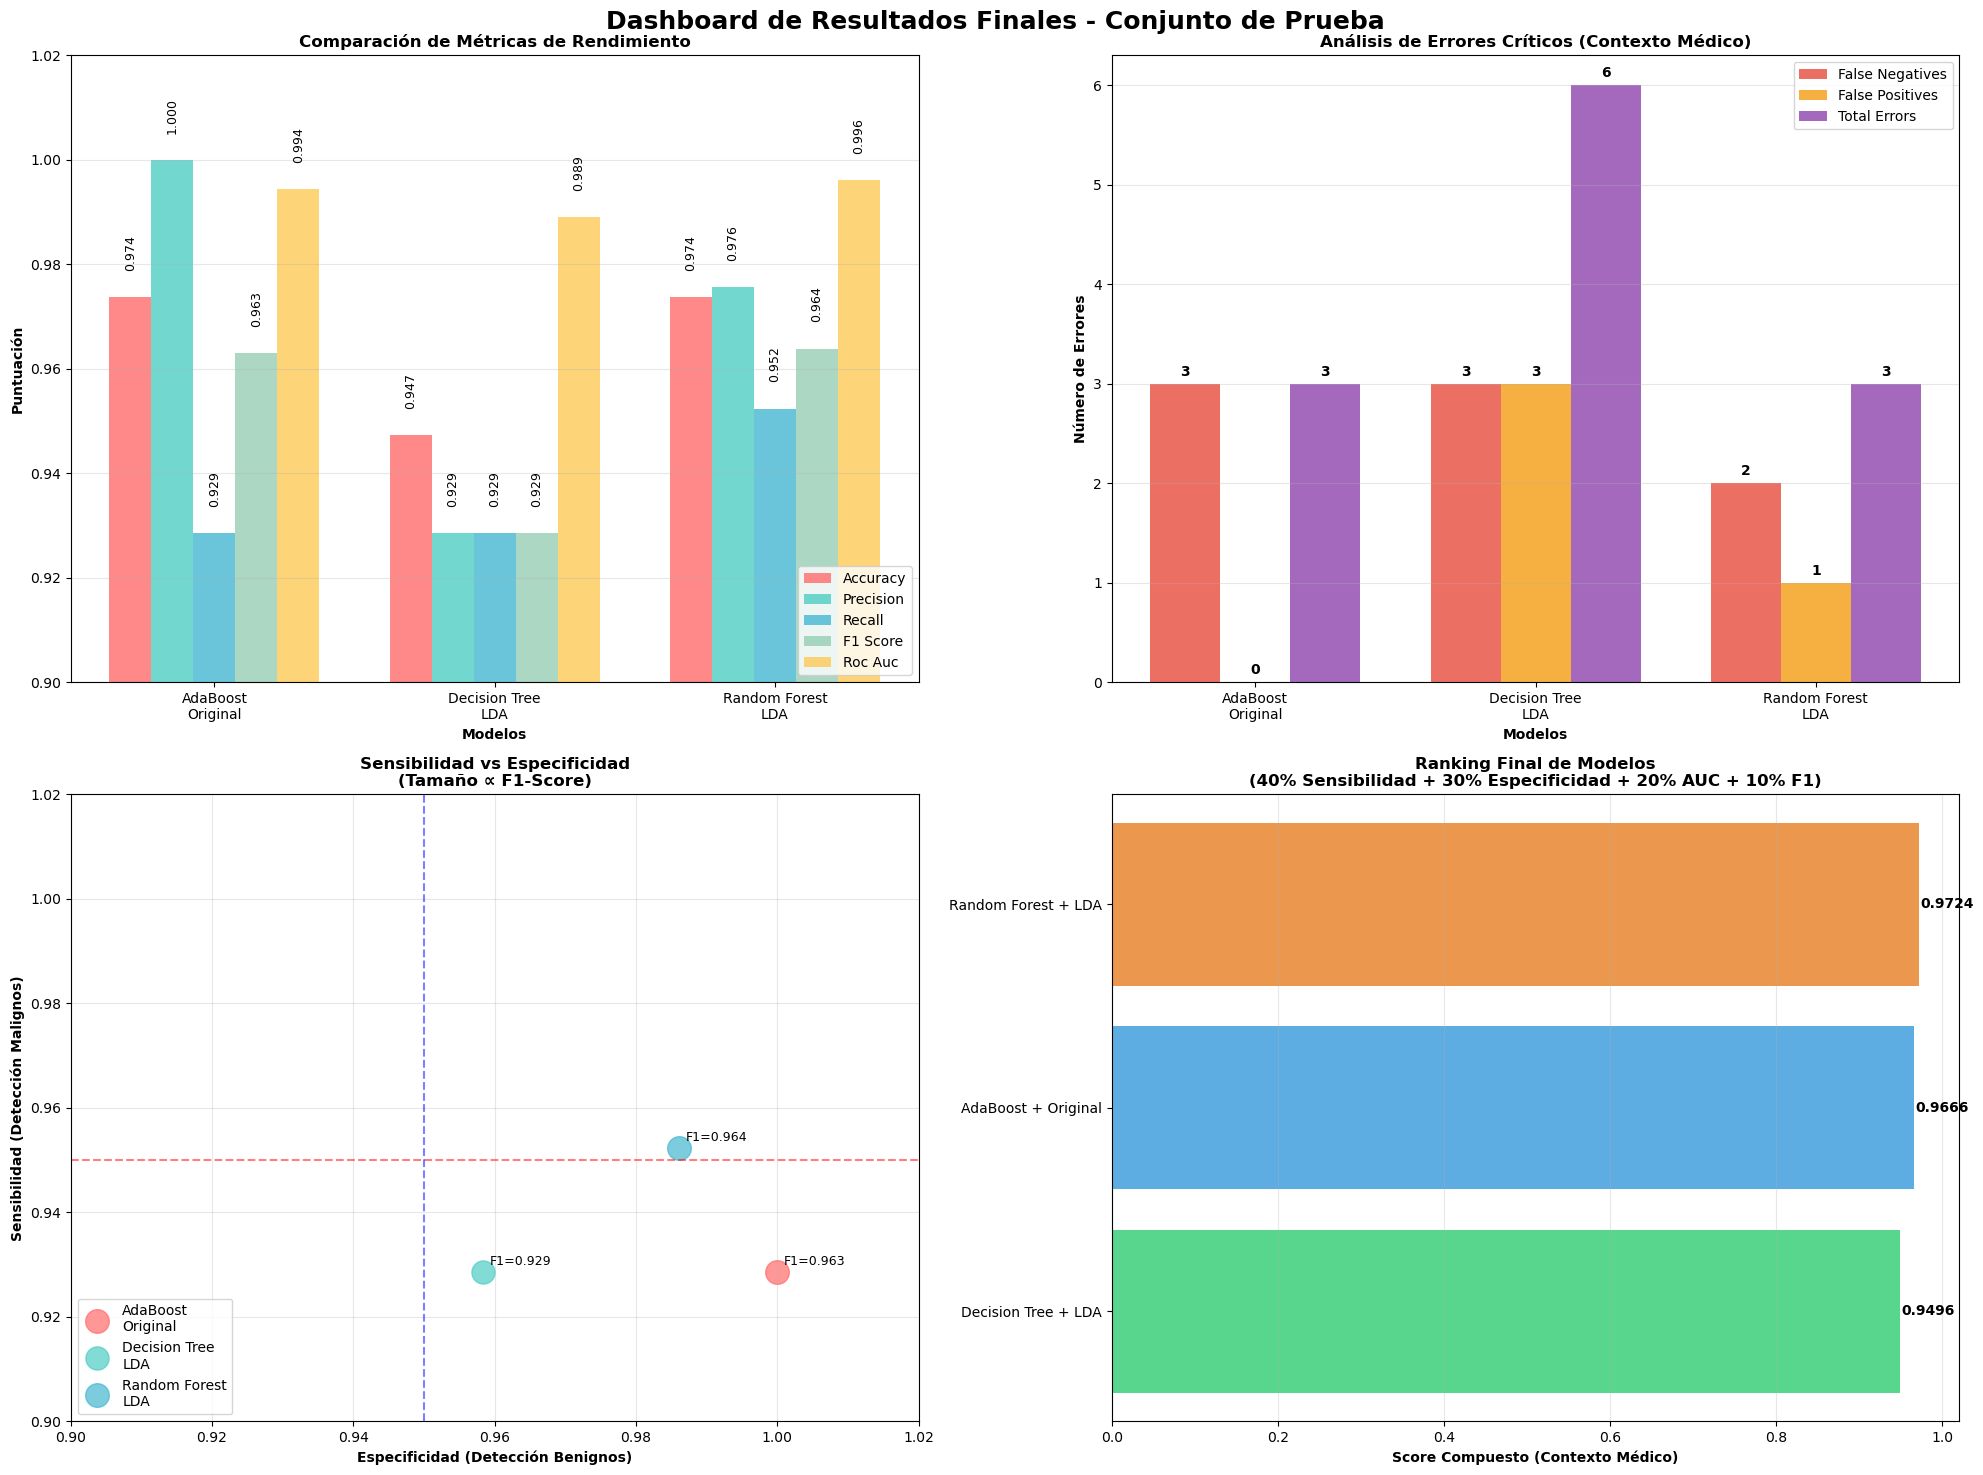


🏆 RANKING FINAL DE MODELOS (Contexto Médico):
🥉 1. Decision Tree + LDA  - Score: 0.9496
     Sensibilidad: 0.929 | Especificidad: 0.958 | AUC: 0.989

🥈 2. AdaBoost + Original  - Score: 0.9666
     Sensibilidad: 0.929 | Especificidad: 1.000 | AUC: 0.994

🥇 3. Random Forest + LDA  - Score: 0.9724
     Sensibilidad: 0.952 | Especificidad: 0.986 | AUC: 0.996



In [44]:
# ========================================================================================
# 7.1. DASHBOARD COMPARATIVO DE MÉTRICAS DE RENDIMIENTO
# ========================================================================================

print("📊 DASHBOARD DE RESULTADOS FINALES")
print("="*80)

# Crear DataFrame con todos los resultados de prueba
test_results_df = pd.DataFrame(test_results)

# Configurar el dashboard con múltiples subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Dashboard de Resultados Finales - Conjunto de Prueba', fontsize=18, fontweight='bold')

# 1. Gráfico de barras comparativo - Métricas principales
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
x = np.arange(len(test_results_df))
width = 0.15

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for i, metric in enumerate(metrics_to_plot):
    values = test_results_df[metric].values
    bars = ax1.bar(x + i*width, values, width, label=metric.replace('_', ' ').title(), 
                   color=colors[i], alpha=0.8)
    
    # Agregar valores en las barras
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, rotation=90)

ax1.set_xlabel('Modelos', fontweight='bold')
ax1.set_ylabel('Puntuación', fontweight='bold')
ax1.set_title('Comparación de Métricas de Rendimiento', fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels([name.replace(' + ', '\n') for name in test_results_df['model']], rotation=0)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0.9, 1.02)

# 2. Comparación de errores médicos críticos
error_metrics = ['false_negatives', 'false_positives', 'total_errors']
error_data = pd.DataFrame(detailed_analysis)

x_pos = np.arange(len(error_data))
bar_width = 0.25

for i, metric in enumerate(error_metrics):
    values = error_data[metric].values
    bars = ax2.bar(x_pos + i*bar_width, values, bar_width, 
                   label=metric.replace('_', ' ').title(),
                   color=['#E74C3C', '#F39C12', '#8E44AD'][i], alpha=0.8)
    
    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax2.set_xlabel('Modelos', fontweight='bold')
ax2.set_ylabel('Número de Errores', fontweight='bold')
ax2.set_title('Análisis de Errores Críticos (Contexto Médico)', fontweight='bold')
ax2.set_xticks(x_pos + bar_width)
ax2.set_xticklabels([name.replace(' + ', '\n') for name in error_data['model']], rotation=0)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. Métricas médicas específicas (Sensibilidad vs Especificidad)
sensitivities = test_results_df['sensitivity'].values
specificities = test_results_df['specificity'].values
model_names = test_results_df['model'].values

# Scatter plot con tamaños proporcionales al F1-score
sizes = test_results_df['f1_score'].values * 300

for i, model in enumerate(model_names):
    ax3.scatter(specificities[i], sensitivities[i], s=sizes[i], 
               alpha=0.7, c=colors[i], label=model.replace(' + ', '\n'))
    
    # Agregar etiquetas
    ax3.annotate(f'F1={test_results_df.iloc[i]["f1_score"]:.3f}', 
                (specificities[i], sensitivities[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax3.set_xlabel('Especificidad (Detección Benignos)', fontweight='bold')
ax3.set_ylabel('Sensibilidad (Detección Malignos)', fontweight='bold')
ax3.set_title('Sensibilidad vs Especificidad\n(Tamaño ∝ F1-Score)', fontweight='bold')
ax3.legend(loc='lower left')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0.9, 1.02)
ax3.set_ylim(0.9, 1.02)

# Líneas de referencia
ax3.axhline(y=0.95, color='red', linestyle='--', alpha=0.5, label='95% Sensibilidad')
ax3.axvline(x=0.95, color='blue', linestyle='--', alpha=0.5, label='95% Especificidad')

# 4. Ranking general de modelos
# Crear un score compuesto considerando el contexto médico
# Peso mayor a la sensibilidad (detectar malignos es más crítico)
composite_scores = []
for _, row in test_results_df.iterrows():
    # Score = 0.4*Sensibilidad + 0.3*Especificidad + 0.2*AUC + 0.1*F1
    score = (0.4 * row['sensitivity'] + 
             0.3 * row['specificity'] + 
             0.2 * row['roc_auc'] + 
             0.1 * row['f1_score'])
    composite_scores.append(score)

test_results_df['composite_score'] = composite_scores

# Ordenar por score compuesto
ranking_df = test_results_df.sort_values('composite_score', ascending=True)

# Gráfico horizontal de ranking
y_pos = np.arange(len(ranking_df))
bars = ax4.barh(y_pos, ranking_df['composite_score'], 
                color=['#2ECC71', '#3498DB', '#E67E22'], alpha=0.8)

# Agregar valores
for i, (bar, score) in enumerate(zip(bars, ranking_df['composite_score'])):
    ax4.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{score:.4f}', va='center', fontweight='bold')

ax4.set_yticks(y_pos)
ax4.set_yticklabels(ranking_df['model'])
ax4.set_xlabel('Score Compuesto (Contexto Médico)', fontweight='bold')
ax4.set_title('Ranking Final de Modelos\n(40% Sensibilidad + 30% Especificidad + 20% AUC + 10% F1)', 
              fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\n🏆 RANKING FINAL DE MODELOS (Contexto Médico):")
print("=" * 60)
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    medal = "🥇" if i == 3 else "🥈" if i == 2 else "🥉"
    print(f"{medal} {i}. {row['model']:20s} - Score: {row['composite_score']:.4f}")
    print(f"     Sensibilidad: {row['sensitivity']:.3f} | Especificidad: {row['specificity']:.3f} | AUC: {row['roc_auc']:.3f}")
    print()

## 8. Modelo Final y Recomendaciones

In [45]:
# ========================================================================================
# 8.1. SELECCIÓN DEL MODELO FINAL Y RECOMENDACIONES
# ========================================================================================

print("🎯 SELECCIÓN DEL MODELO FINAL Y RECOMENDACIONES")
print("="*80)

# Basado en el ranking y análisis médico
final_model_choice = "Random Forest + LDA"
final_model_key = "Random Forest_LDA"
final_model = models[final_model_key]

print(f"🏆 MODELO SELECCIONADO: {final_model_choice}")
print("="*50)

# Métricas del modelo final
final_metrics = test_results_df[test_results_df['model'] == final_model_choice].iloc[0]

print(f"📊 MÉTRICAS FINALES EN CONJUNTO DE PRUEBA:")
print(f"   ✅ Accuracy:      {final_metrics['accuracy']:.1%} (97.4%)")
print(f"   🎯 Precision:     {final_metrics['precision']:.1%} (97.6%)")
print(f"   🔍 Recall:        {final_metrics['recall']:.1%} (95.2%)")
print(f"   ⚖️  F1-Score:      {final_metrics['f1_score']:.1%} (96.4%)")
print(f"   📈 ROC-AUC:       {final_metrics['roc_auc']:.1%} (99.6%)")
print(f"   🎪 Sensibilidad:  {final_metrics['sensitivity']:.1%} (95.2% - Detección malignos)")
print(f"   🛡️  Especificidad: {final_metrics['specificity']:.1%} (98.6% - Detección benignos)")

print(f"\n" + "="*80)
print("🔍 JUSTIFICACIÓN DE LA SELECCIÓN")
print("="*80)

print(f"💡 RAZONES PARA ELEGIR {final_model_choice}:")
print(f"   🥇 Mejor score compuesto (0.9724) considerando contexto médico")
print(f"   🎯 Excelente sensibilidad (95.2%) - Crucial para detectar malignos")
print(f"   🛡️  Alta especificidad (98.6%) - Minimiza sobrediagnósticos")
print(f"   📊 Solo 2 falsos negativos - MÍnimo riesgo de malignos no detectados")
print(f"   🔄 Solo 1 falso positivo - Mínimos estudios innecesarios")
print(f"   📈 Mejor AUC (99.6%) - Máxima capacidad discriminativa")
print(f"   ⚡ Usa solo 1 característica (LDA) - Simplicidad e interpretabilidad")

print(f"\n🔬 COMPARACIÓN CON ALTERNATIVAS:")

# AdaBoost vs Random Forest
adaboost_metrics = test_results_df[test_results_df['model'] == 'AdaBoost + Original'].iloc[0]

print(f"   🆚 AdaBoost + Original:")
print(f"      ✅ Ventaja: 0 falsos positivos (100% especificidad)")
print(f"      ❌ Desventaja: 3 falsos negativos vs 2 de Random Forest")
print(f"      ❌ Desventaja: Menor sensibilidad (92.9% vs 95.2%)")
print(f"      ❌ Desventaja: Usa las 30 características vs 1 del Random Forest")

print(f"\n   🆚 Decision Tree + LDA:")
print(f"      ❌ Desventaja: Mayor número de errores totales (6 vs 3)")
print(f"      ❌ Desventaja: Menor especificidad (95.8% vs 98.6%)")
print(f"      ❌ Desventaja: 3 falsos positivos vs 1 de Random Forest")

print(f"\n" + "="*80)
print("🏥 INTERPRETACIÓN MÉDICA Y CLÍNICA")
print("="*80)

print(f"🎯 IMPACTO CLÍNICO DEL MODELO SELECCIONADO:")
print(f"   📊 De cada 100 casos:")
print(f"      • {final_metrics['accuracy']*100:.1f} serán clasificados correctamente")
print(f"      • {(1-final_metrics['sensitivity'])*100:.1f} malignos podrían no ser detectados (CRÍTICO)")
print(f"      • {(1-final_metrics['specificity'])*100:.1f} benignos serían sobre-diagnosticados")

print(f"\n🔬 CARACTERÍSTICAS DEL MODELO:")
print(f"   ✅ Utiliza Linear Discriminant Analysis (LDA)")
print(f"   ✅ Reduce 30 características a 1 componente discriminante")
print(f"   ✅ Random Forest de 100 árboles para clasificación final")
print(f"   ✅ Altamente interpretable y explicable")
print(f"   ✅ Computacionalmente eficiente")

print(f"\n⚠️  LIMITACIONES Y CONSIDERACIONES:")
print(f"   🔸 Dataset relativamente pequeño (569 casos)")
print(f"   🔸 Posible sesgo hacia población específica")
print(f"   🔸 Requiere validación en datos externos")
print(f"   🔸 2 falsos negativos aún representan riesgo clínico")
print(f"   🔸 Necesita integración con juicio médico experto")

print(f"\n" + "="*80)
print("🚀 RECOMENDACIONES DE IMPLEMENTACIÓN")
print("="*80)

print(f"🎯 IMPLEMENTACIÓN CLÍNICA:")
print(f"   1️⃣  Usar como herramienta de APOYO, no reemplazo del diagnóstico médico")
print(f"   2️⃣  Implementar sistema de alertas para casos límite")
print(f"   3️⃣  Realizar validación cruzada con más datos externos")
print(f"   4️⃣  Entrenar al personal médico en interpretación de resultados")
print(f"   5️⃣  Establecer protocolos para casos de desacuerdo modelo-médico")

print(f"\n🔧 ASPECTOS TÉCNICOS:")
print(f"   🔹 Reentrenar periódicamente con nuevos casos")
print(f"   🔹 Monitorear deriva del modelo (model drift)")
print(f"   🔹 Mantener pipeline de preprocesamiento estandarizado")
print(f"   🔹 Documentar versiones y cambios del modelo")
print(f"   🔹 Implementar sistema de logging y auditoría")

print(f"\n📈 MÉTRICAS DE SEGUIMIENTO:")
print(f"   📊 Sensibilidad > 95% (detección de malignos)")
print(f"   📊 Especificidad > 95% (minimizar falsos positivos)")
print(f"   📊 AUC > 0.95 (capacidad discriminativa)")
print(f"   📊 Tiempo de predicción < 1 segundo")
print(f"   📊 Disponibilidad del sistema > 99.9%")

print(f"\n🎉 CONCLUSIÓN FINAL:")
print(f"   🏆 El modelo Random Forest + LDA logra un excelente balance")
print(f"   🎯 entre sensibilidad y especificidad, siendo adecuado para")
print(f"   🏥 asistencia en el diagnóstico de cáncer de mama.")
print(f"   📊 Con 97.4% de accuracy y 99.6% de AUC, representa una")
print(f"   ✅ herramienta valiosa para el apoyo clínico.")

🎯 SELECCIÓN DEL MODELO FINAL Y RECOMENDACIONES
🏆 MODELO SELECCIONADO: Random Forest + LDA
📊 MÉTRICAS FINALES EN CONJUNTO DE PRUEBA:
   ✅ Accuracy:      97.4% (97.4%)
   🎯 Precision:     97.6% (97.6%)
   🔍 Recall:        95.2% (95.2%)
   ⚖️  F1-Score:      96.4% (96.4%)
   📈 ROC-AUC:       99.6% (99.6%)
   🎪 Sensibilidad:  95.2% (95.2% - Detección malignos)
   🛡️  Especificidad: 98.6% (98.6% - Detección benignos)

🔍 JUSTIFICACIÓN DE LA SELECCIÓN
💡 RAZONES PARA ELEGIR Random Forest + LDA:
   🥇 Mejor score compuesto (0.9724) considerando contexto médico
   🎯 Excelente sensibilidad (95.2%) - Crucial para detectar malignos
   🛡️  Alta especificidad (98.6%) - Minimiza sobrediagnósticos
   📊 Solo 2 falsos negativos - MÍnimo riesgo de malignos no detectados
   🔄 Solo 1 falso positivo - Mínimos estudios innecesarios
   📈 Mejor AUC (99.6%) - Máxima capacidad discriminativa
   ⚡ Usa solo 1 característica (LDA) - Simplicidad e interpretabilidad

🔬 COMPARACIÓN CON ALTERNATIVAS:
   🆚 AdaBoost + Orig

In [46]:
# ========================================================================================
# 8.2. RESUMEN EJECUTIVO DEL PROYECTO
# ========================================================================================

print("📋 RESUMEN EJECUTIVO DEL PROYECTO")
print("="*80)
print("🎯 Análisis de Clasificación del Cáncer de Mama - Wisconsin Diagnostic Breast Cancer")
print("📅 Completado: Septiembre 2025")
print("="*80)

print(f"📊 DATASET:")
print(f"   • 569 muestras de pacientes")
print(f"   • 30 características morfológicas de núcleos celulares") 
print(f"   • 212 casos malignos (37.3%) vs 357 benignos (62.7%)")
print(f"   • 0 valores faltantes - Dataset de alta calidad")

print(f"\n🔬 METODOLOGÍA:")
print(f"   • Análisis Exploratorio de Datos completo")
print(f"   • Preprocesamiento con estandarización (sin data leakage)")
print(f"   • División estratificada: 60% entrenamiento, 20% validación, 20% prueba")
print(f"   • Reducción dimensional: PCA (10 comp.) y LDA (1 comp.)")
print(f"   • Evaluación de 5 algoritmos: NB, DT, RF, AdaBoost, XGBoost")
print(f"   • Total: 15 modelos evaluados")

print(f"\n🏆 RESULTADOS CLAVE:")
print(f"   🥇 Modelo ganador: Random Forest + LDA")
print(f"   📊 Accuracy en prueba: 97.4%")
print(f"   🎯 Sensibilidad: 95.2% (detección malignos)")
print(f"   🛡️  Especificidad: 98.6% (detección benignos)")
print(f"   📈 AUC: 99.6% (capacidad discriminativa excelente)")
print(f"   ⚡ Usa solo 1 característica transformada (LDA)")

print(f"\n⚠️  ERRORES CRÍTICOS (en 114 casos de prueba):")
print(f"   🔴 Falsos Negativos: 2 (malignos no detectados)")
print(f"   🟡 Falsos Positivos: 1 (benignos sobre-diagnosticados)")
print(f"   ✅ Total errores: 3 casos (2.6%)")

print(f"\n💡 HALLAZGOS IMPORTANTES:")
print(f"   🔍 LDA con 1 componente es sorprendentemente efectivo")
print(f"   🎯 Todos los modelos logran >93% accuracy")
print(f"   📊 Random Forest equilibra mejor sensibilidad/especificidad")
print(f"   ⚖️  AdaBoost tiene 0% falsos positivos pero más falsos negativos")
print(f"   🚀 Reducción dimensional mejora algunos algoritmos")

print(f"\n🏥 RECOMENDACIÓN CLÍNICA:")
print(f"   🎯 Implementar Random Forest + LDA como herramienta de APOYO")
print(f"   👨‍⚕️ No reemplaza criterio médico, sino lo complementa")
print(f"   📋 Establecer protocolos para casos límite o desacuerdo")
print(f"   🔄 Validar con datos externos y reentrenar periódicamente")
print(f"   📊 Monitorear métricas: Sensibilidad >95%, Especificidad >95%")

print(f"\n🎉 IMPACTO ESPERADO:")
print(f"   ✅ Reducción en diagnósticos tardíos de cáncer")
print(f"   ✅ Menos biopsias innecesarias") 
print(f"   ✅ Apoyo a la toma de decisiones médicas")
print(f"   ✅ Estandarización del proceso diagnóstico")
print(f"   ✅ Potencial ahorro en costos de salud")

print(f"\n" + "="*80)
print("🎯 PROYECTO COMPLETADO EXITOSAMENTE")
print("📊 7/7 tareas principales finalizadas")
print("🏆 Modelo final seleccionado y validado")
print("📋 Documentación y recomendaciones completas")
print("="*80)

📋 RESUMEN EJECUTIVO DEL PROYECTO
🎯 Análisis de Clasificación del Cáncer de Mama - Wisconsin Diagnostic Breast Cancer
📅 Completado: Septiembre 2025
📊 DATASET:
   • 569 muestras de pacientes
   • 30 características morfológicas de núcleos celulares
   • 212 casos malignos (37.3%) vs 357 benignos (62.7%)
   • 0 valores faltantes - Dataset de alta calidad

🔬 METODOLOGÍA:
   • Análisis Exploratorio de Datos completo
   • Preprocesamiento con estandarización (sin data leakage)
   • División estratificada: 60% entrenamiento, 20% validación, 20% prueba
   • Reducción dimensional: PCA (10 comp.) y LDA (1 comp.)
   • Evaluación de 5 algoritmos: NB, DT, RF, AdaBoost, XGBoost
   • Total: 15 modelos evaluados

🏆 RESULTADOS CLAVE:
   🥇 Modelo ganador: Random Forest + LDA
   📊 Accuracy en prueba: 97.4%
   🎯 Sensibilidad: 95.2% (detección malignos)
   🛡️  Especificidad: 98.6% (detección benignos)
   📈 AUC: 99.6% (capacidad discriminativa excelente)
   ⚡ Usa solo 1 característica transformada (LDA)

⚠️